<a href="https://colab.research.google.com/github/xghan99/Friends-EDA/blob/main/FriendsEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Data

In [39]:
#Pulling Data from github
url_episodes = "https://raw.githubusercontent.com/xghan99/Friends-EDA/main/friends_episodes.csv"
url_imdb = "https://raw.githubusercontent.com/xghan99/Friends-EDA/main/friends_imdb.csv"
import pandas as pd
df_episodes = pd.read_csv(url_episodes)
df_imdb = pd.read_csv(url_imdb)

In [40]:
df_episodes.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0


In [41]:
df_imdb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,The One Where Monica Gets a Roommate,22 Sep. 1994,8.3,8378,"Monica and the gang introduce Rachel to the ""r..."
1,1,2,The One with the Sonogram at the End,29 Sep. 1994,8.0,6441,Ross finds out his ex-wife is pregnant. Rachel...
2,1,3,The One with the Thumb,6 Oct. 1994,8.1,6060,Monica becomes irritated when everyone likes h...
3,1,4,The One with George Stephanopoulos,13 Oct. 1994,8.1,5892,Joey and Chandler take Ross to a hockey game t...
4,1,5,The One with the East German Laundry Detergent,20 Oct. 1994,8.4,5872,"Eager to spend time with Rachel, Ross pretends..."


## Check for Missing Values

In [42]:
df_episodes.isnull().sum()

season                   0
episode_num_in_season    0
episode_num_overall      0
title                    0
directed_by              0
written_by               0
original_air_date        0
prod_code                0
us_viewers               0
dtype: int64

In [43]:
df_imdb.isnull().sum()

season               0
episode_num          0
title                0
original_air_date    0
imdb_rating          0
total_votes          0
desc                 0
dtype: int64

No missing values in either of the datasets

## Overview of Dataset


In [44]:
df_episodes.shape

(236, 9)

In [45]:
df_imdb.shape

(235, 7)

df_episodes has 236 rows and 9 columns, while df_imdb has 235 rows and 7 columns. It is odd that the episodes dataset has 1 more entry than the imdb dataset. Given that the data is in chronological order. Lets check the tail of the datasets.

In [11]:
df_episodes.tail()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0
235,10,18,236,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176267,52460000.0


In [12]:
df_imdb.tail()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
230,10,13,The One Where Joey Speaks French,19 Feb. 2004,8.5,4054,Phoebe tries to teach Joey to speak French for...
231,10,14,The One with Princess Consuela,26 Feb. 2004,8.6,3953,When Phoebe goes to get her name changed she r...
232,10,15,The One Where Estelle Dies,22 Apr. 2004,8.5,3700,Ross tries to get Rachel to go back to Ralph L...
233,10,16,The One with Rachel's Going Away Party,29 Apr. 2004,8.9,4290,"The gang throws Rachel a goodbye party, during..."
234,10,17,The Last One,6 May 2004,9.7,14033,Phoebe races Ross to the airport in a bid to s...


In [13]:
df_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 236 non-null    int64  
 1   episode_num_in_season  236 non-null    int64  
 2   episode_num_overall    236 non-null    int64  
 3   title                  236 non-null    object 
 4   directed_by            236 non-null    object 
 5   written_by             236 non-null    object 
 6   original_air_date      236 non-null    object 
 7   prod_code              236 non-null    object 
 8   us_viewers             236 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 16.7+ KB


The episode titled "The Last One" was actually 2 episodes combined into 1, which explains the discrepancy. Hence, the last row of df_episodes would be deleted.

In [14]:
#Removing last entry of df_episodes
df_episodes = df_episodes[df_episodes["episode_num_overall"]!=236]
df_episodes.tail()


,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
230,10,13,231,The One Where Joey Speaks French,Gary Halvorson,Sherry Bilsing-Graham & Ellen Plummer,2004-02-19,176261,24270000.0
231,10,14,232,The One with Princess Consuela,Gary Halvorson,Story by: Robert CarlockTeleplay by: Tracy Reilly,2004-02-26,176263,22820000.0
232,10,15,233,The One Where Estelle Dies,Gary Halvorson,Story by: Mark KunerthTeleplay by: David Crane...,2004-04-22,176264,22640000.0
233,10,16,234,The One with Rachel's Going Away Party,Gary Halvorson,Andrew Reich & Ted Cohen,2004-04-29,176265,24510000.0
234,10,17,235,The Last One,Kevin S. Bright,Marta Kauffman & David Crane,2004-05-06,176266,52460000.0


In [15]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             235 non-null    int64  
 1   episode_num        235 non-null    int64  
 2   title              235 non-null    object 
 3   original_air_date  235 non-null    object 
 4   imdb_rating        235 non-null    float64
 5   total_votes        235 non-null    int64  
 6   desc               235 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 13.0+ KB


In [16]:
df_episodes.describe()

,season,episode_num_in_season,episode_num_overall,us_viewers
count,235.000000,235.000000,235.000000,2.350000e+02
mean,5.357447,12.353191,117.897872,2.527562e+07
std,2.804129,6.941048,68.122927,4.911925e+06
min,1.000000,1.000000,1.000000,1.565000e+07
25%,3.000000,6.000000,59.500000,2.235000e+07
50%,5.000000,12.000000,118.000000,2.448000e+07
75%,8.000000,18.000000,176.500000,2.761000e+07
max,10.000000,25.000000,235.000000,5.290000e+07


The maximum number of us_viewers was almost 2 times that of the 75th percentile.

In [17]:
df_imdb.describe()

,season,episode_num,imdb_rating,total_votes
count,235.000000,235.000000,235.000000,235.000000
mean,5.357447,12.353191,8.422553,4439.387234
std,2.804129,6.941048,0.410183,1081.935073
min,1.000000,1.000000,7.100000,3427.000000
25%,3.000000,6.000000,8.100000,3832.500000
50%,5.000000,12.000000,8.400000,4168.000000
75%,8.000000,18.000000,8.700000,4719.000000
max,10.000000,25.000000,9.700000,14033.000000


The maximum total_votes was nearly 3 times that of the 75th percentile.

In [18]:
df_episodes["episode_num_overall"].value_counts()

13     2
235    1
75     1
87     1
86     1
      ..
153    1
152    1
151    1
150    1
1      1
Name: episode_num_overall, Length: 234, dtype: int64

It can be seen here that there might be a duplicate episode number.

In [19]:
#Searching for Duplicate
df_episodes[df_episodes["episode_num_overall"]==13]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
12,1,13,13,The One with the Boobies,Alan Myerson,Alexa Junge,1995-01-19,456664,25800000.0
36,2,13,13,The One After the Superbowl: Part 2,Michael Lembeck,Michael Borkow,1996-01-28,457314,52900000.0


Upon further investigation, the episode_num_overall was labelled wrongly. The episode_num_overall should be 37 rather than 13, and is corrected in the code below.

In [20]:
#Correcting Duplicate
df_episodes.loc[36, "episode_num_overall"]=37
df_episodes[df_episodes["episode_num_overall"]==13]

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
12,1,13,13,The One with the Boobies,Alan Myerson,Alexa Junge,1995-01-19,456664,25800000.0


In [21]:
len(pd.unique(df_imdb["title"]))

235

There is no duplicate episode in the imdb dataframe

## Visualisations

### How has the popularity of Friends Changed with Each Episode?

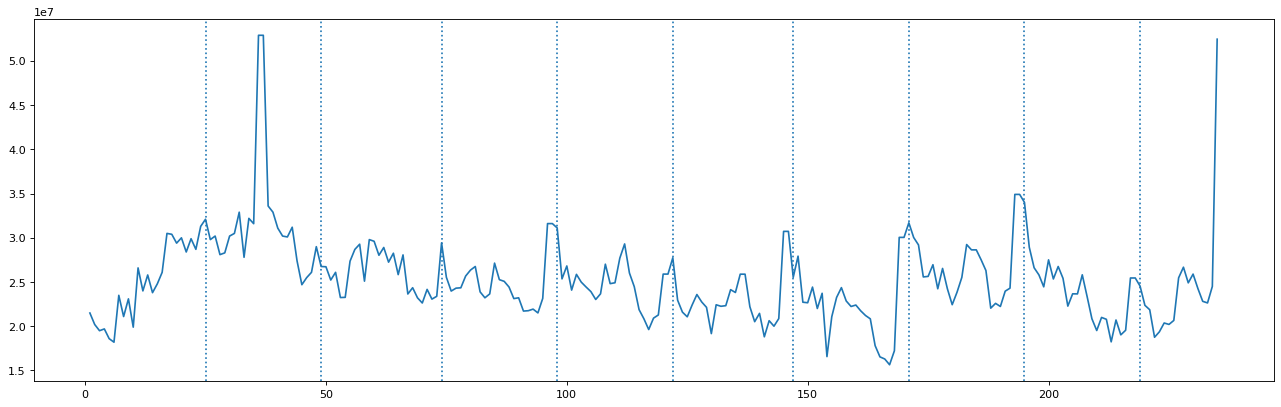

In [32]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20,6), dpi=80)
plt.plot(df_episodes["episode_num_overall"], df_episodes["us_viewers"])
season_boundaries = [25, 49, 74, 98, 122, 147, 171, 195, 219]
for boundary in season_boundaries:
  plt.axvline(x=boundary, linestyle="dotted")


It can be seen that Friends hit its peak viewership in Season 2 and the final episode. Viewership also dropped to an all time low in Season 7.

### How has the Show's IMDb Rating Changed with Each Episode?

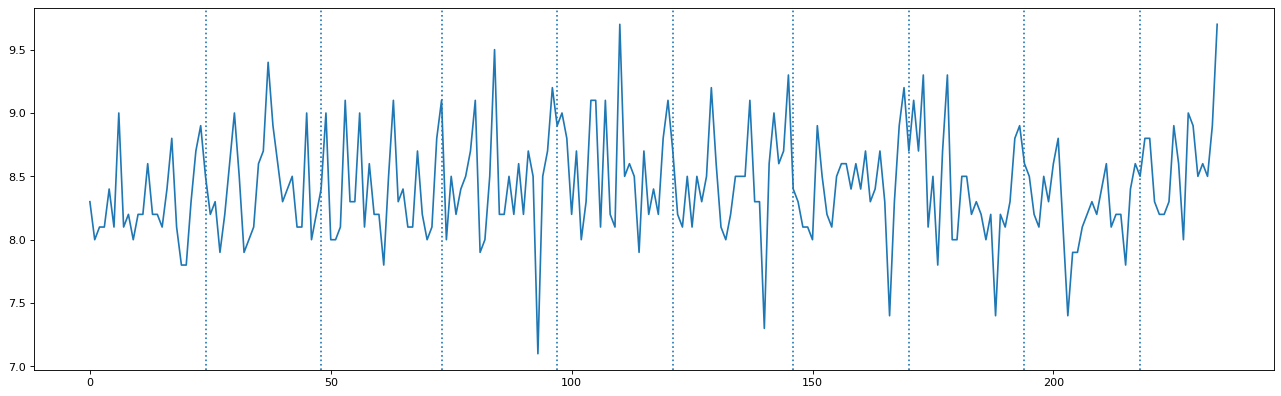

In [33]:
figure(figsize=(20,6), dpi=80)
plt.plot(df_imdb["imdb_rating"])
for boundary in season_boundaries:
  plt.axvline(x=boundary-1, linestyle="dotted")

For IMDb ratings, Friends achieved a peak in its final episode and in Season 5, and achieved a low in Season 4.

### Are IMDb Ratings associated with Viewership?

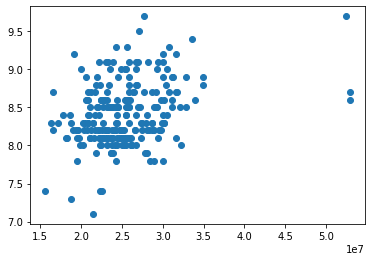

In [40]:
plt.scatter(df_episodes["us_viewers"], df_imdb["imdb_rating"])

There seems to be positive correlation between IMDb ratings and viewership.

### Top 5 Directors by Total Number of Episodes

In [41]:
df_episodes.value_counts("directed_by").head()

directed_by
Gary Halvorson     54
Kevin S. Bright    52
Michael Lembeck    24
James Burrows      15
Gail Mancuso       14
dtype: int64

### Top 5 Directors by Average Viewership

In [42]:
df_episodes.groupby(["directed_by"]).agg({"us_viewers":["mean"]}).sort_values(("us_viewers","mean"), ascending = False).head()

,us_viewers
,mean
directed_by,
Mary Kay Place,3.290000e+07
Thomas Schlamme,3.190000e+07
Michael Lembeck,2.958792e+07
Ellen Gittelsohn,2.830000e+07
Robby Benson,2.793167e+07


### Which Character has Appeared the Most in the Title?

In [31]:
characters = ["Joey","Chandler","Ross","Rachel","Monica","Phoebe"]
count=[]
for character in characters:
  count.append(df_episodes["title"].str.count(character).sum())
pd.DataFrame(count, characters).sort_values(0, ascending = False)

,0
Rachel,28
Ross,24
Joey,16
Chandler,11
Phoebe,10
Monica,9


Ross and Rachel has appeared the most in the title. I guess their relationship is the highlight of the show.